In [1]:
import numpy as np
import random,operator
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
import pandas as pd

In [63]:
#data Set Link
#https://people.sc.fsu.edu/~jburkardt/datasets/tsp/tsp.html
with open('tsp.txt') as players_data:
    x=players_data.read()

In [64]:
#preprocessing into our desired form for our problem.
x=(x.split("\n"))
X=[i.split(" ")[0] for i in x]
Y=[i.split(" ")[-1] for i in x]
x=[int(i) for i in X if i!=""]
y=[int(i) for i in Y if i!=""]
points=[[i,j] for i , j in zip(x,y)]
points

[[6734, 1453],
 [2233, 10],
 [5530, 1424],
 [3082, 841],
 [7608, 1644],
 [7573, 4458],
 [7265, 3716],
 [6898, 1268],
 [1112, 1885],
 [5468, 2049],
 [5989, 2606],
 [4706, 2873],
 [4612, 2674],
 [6347, 2035],
 [6107, 2683],
 [7611, 669],
 [7462, 5184],
 [7732, 3590],
 [5900, 4723],
 [4483, 3561],
 [6101, 3369],
 [5199, 1110],
 [1633, 2182],
 [4307, 2809],
 [7555, 2322],
 [7541, 1006],
 [3177, 4819],
 [7352, 3981],
 [7545, 756],
 [3245, 4506],
 [6426, 2801],
 [4608, 3305],
 [7248, 3173],
 [7762, 1198],
 [7392, 2216],
 [3484, 3779],
 [6271, 4595],
 [4985, 2244],
 [1916, 2829],
 [7280, 2135],
 [7509, 140],
 [6807, 1569],
 [5185, 4899],
 [3023, 3239]]

In [61]:
#generating random names for dataset .
k=65
names=[]
for i in range(26):
    names.append(chr(k))
    k+=1
k=97
for i in range(26,44):
    names.append(chr(k))
    k+=1
names

['A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r']

In [52]:
def plot_graph(cities,city_names):
    plt.figure(figsize=(20,10))
    x = [i[0] for i in cities]
    y = [i[1] for i in cities]
    x1=[x[0],x[-1]]
    y1=[y[0],y[-1]]
    plt.plot(x, y, 'b', x1, y1, 'r')
    plt.scatter (x, y)
    for i, txt in enumerate(city_names):
        plt.annotate(txt, (cities[i][0], cities[i][1]),horizontalalignment='center',size=20)
    plt.show()
    return 

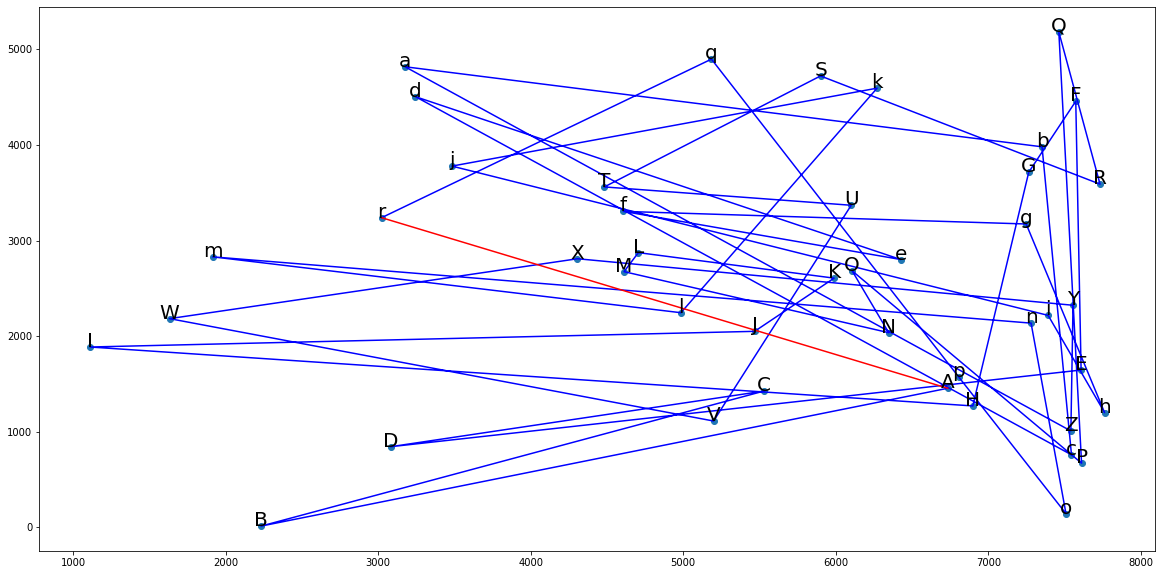

In [53]:
plot_graph(points,names)

In [19]:
def initialPopulation(cities, populationSize):
    population = [generatePath(cities) for i in range(0, populationSize)]
    return population
population = initialPopulation(cityList,10)

10

In [31]:
#it creates a path for us it may be feasible or not fesiable
# random.sample(val , len of required) it gives a values from 1st argument randomly with required size 

def CreatePopulation(cities, populationSize):
    population = [random.sample(cities, len(cities)) for i in range(0, populationSize)]
    return population
population = CreatePopulation(points,10)
population

[[[6107, 2683],
  [4985, 2244],
  [7392, 2216],
  [5530, 1424],
  [6426, 2801],
  [3245, 4506],
  [5185, 4899],
  [7611, 669],
  [7352, 3981],
  [5989, 2606],
  [7509, 140],
  [6734, 1453],
  [4612, 2674],
  [6101, 3369],
  [6898, 1268],
  [4483, 3561],
  [1112, 1885],
  [4307, 2809],
  [5468, 2049],
  [7732, 3590],
  [7280, 2135],
  [7545, 756],
  [7573, 4458],
  [1916, 2829],
  [6271, 4595],
  [3023, 3239],
  [7248, 3173],
  [3177, 4819],
  [6347, 2035],
  [7265, 3716],
  [4706, 2873],
  [7462, 5184],
  [7541, 1006],
  [7555, 2322],
  [5900, 4723],
  [3082, 841],
  [5199, 1110],
  [6807, 1569],
  [4608, 3305],
  [7762, 1198],
  [7608, 1644],
  [2233, 10],
  [3484, 3779],
  [1633, 2182]],
 [[1633, 2182],
  [7611, 669],
  [7732, 3590],
  [7555, 2322],
  [4706, 2873],
  [6101, 3369],
  [7762, 1198],
  [6734, 1453],
  [4483, 3561],
  [3023, 3239],
  [6347, 2035],
  [6107, 2683],
  [3177, 4819],
  [5199, 1110],
  [7573, 4458],
  [7392, 2216],
  [7248, 3173],
  [4985, 2244],
  [5468, 2049]

In [32]:
def distance_between_cities(cities):
    data = dict()
    for index, value in enumerate(cities):
        x1 = cities[index][0]
        y1 = cities[index][1]
        if index + 1 <= len(cities)-1:
            x2 = cities[index+1][0]
            y2 = cities[index+1][1]
            xdiff = x2 - x1
            ydiff = y2 - y1
            dst = (xdiff*xdiff + ydiff*ydiff)** 0.5
            data['Distance from city '+ str(index+1) +' to city ' + str(index+2)] = dst 
        elif index + 1 > len(cities)-1:
            x2 = cities[0][0]
            y2 = cities[0][1]
            xdiff = x2 - x1
            ydiff = y2 - y1
            dst = (xdiff*xdiff + ydiff*ydiff)** 0.5
            data['Distance from city '+ str(index+1) + ' to city ' + str(index +2 -len(cities))] = dst
              
    return data

In [33]:
# total path cost is calculated by total_distance function

def total_distance(cities):
    total = sum(distance_between_cities(cities).values())
    return total

#total ppath cost for our points
total_distance(points)

127024.62891705129

In [34]:
def fitness(cities):
    total_dis = total_distance(cities)
    fitness= 0.0
    fitness = 1 / float(total_dis)
    return fitness
fitness(points)

7.872489048190906e-06

In [35]:
#item getter is modeule which is used to get a certain element in module

def rankPathes(population):
    fitnessResults = {}
    for i in range(len(population)):
        fitnessResults[i] = fitness(population[i])
    return sorted(fitnessResults.items(), key = operator.itemgetter(1), reverse = True)
rankPathes(population)

[(9, 8.400630287674033e-06),
 (5, 8.30795955112289e-06),
 (8, 8.305473866804292e-06),
 (3, 8.098344322313166e-06),
 (4, 8.021952065724633e-06),
 (7, 7.932923723476493e-06),
 (6, 7.843764041134176e-06),
 (1, 7.76794606508249e-06),
 (0, 7.65095019176653e-06),
 (2, 7.2831796720825586e-06)]

In [36]:
def perform_selection(pop, eliteSize):
    #output = rankPathes(population)
    df = pd.DataFrame(np.array(pop), columns=["Index","Fitness"])
    df['cumulative_sum'] = df.Fitness.cumsum()
    df['cum_percentage'] = 100*df.cumulative_sum/df.Fitness.sum()
    selected_values = [pop[i][0] for i in range(eliteSize)]
    for i in range(len(pop) - eliteSize):
        pick = 100*random.random()
        for i in range(0, len(pop)):
            if pick <= df.iat[i,3]:
                selected_values.append(pop[i][0])
                break
    return selected_values

In [37]:
out11 = rankPathes(population)
selected_values = perform_selection(out11,5)
print(selected_values)

[9, 5, 8, 3, 4, 8, 2, 9, 5, 4]


In [38]:
def do_mating_pool(population, selected_values):
    matingpool = [population[selected_values[i]] for i in range(len(selected_values))]
    return matingpool
mp = do_mating_pool(population, selected_values)

In [41]:
#doing  cross over 

def do_breed(first_parent, second_parent):
    index_1= int(random.random() * len(first_parent))
    index_2 = int(random.random() * len(second_parent))
    
    first_spilt = min(index_1, index_2)
    last_split = max(index_1, index_2)

    partial_parent1 = [first_parent[i] for i in range(first_spilt, last_split)]
    partial_parent2 = [i for i in second_parent if i not in partial_parent1]

    tot = partial_parent1+partial_parent2
    return tot

In [42]:
#it takes mating population and from that i will select first elite into next generation
#and remaining will do crossover with any other in chromosome

def do_breed_population(my_mating_pool, eliteSize):
    ln = len(my_mating_pool) - eliteSize
    pl = random.sample(my_mating_pool, len(my_mating_pool))
    #tot1 contains first five elite chromosomes
    tot1 = [my_mating_pool[i] for i in range(eliteSize)]
    #tot2 contains five newely created chromosomes which are formed 
    #by doing crossover for two randomely picked from parent chromosomes 
    tot2 = [do_breed(pl[i], pl[len(my_mating_pool)-i-1]) for i in range(ln)]#do breed performs two point crossover
    #finally size of 10 ,popoulation with first five elite
    #and next five new offsprings are created is returned 
    tot = tot1+tot2 
    return tot
do_breed_population(mp,2)

[[[7352, 3981],
  [7732, 3590],
  [7280, 2135],
  [6898, 1268],
  [7762, 1198],
  [6107, 2683],
  [4985, 2244],
  [1112, 1885],
  [5989, 2606],
  [7462, 5184],
  [1633, 2182],
  [4307, 2809],
  [3484, 3779],
  [3245, 4506],
  [6347, 2035],
  [7265, 3716],
  [4608, 3305],
  [7611, 669],
  [7509, 140],
  [7573, 4458],
  [6426, 2801],
  [6807, 1569],
  [7392, 2216],
  [7248, 3173],
  [7555, 2322],
  [3082, 841],
  [6734, 1453],
  [3023, 3239],
  [5900, 4723],
  [3177, 4819],
  [5199, 1110],
  [5530, 1424],
  [4612, 2674],
  [6101, 3369],
  [7608, 1644],
  [2233, 10],
  [4706, 2873],
  [5185, 4899],
  [6271, 4595],
  [1916, 2829],
  [7545, 756],
  [4483, 3561],
  [7541, 1006],
  [5468, 2049]],
 [[4483, 3561],
  [7462, 5184],
  [4985, 2244],
  [3082, 841],
  [6107, 2683],
  [7762, 1198],
  [7392, 2216],
  [6807, 1569],
  [3245, 4506],
  [7265, 3716],
  [7573, 4458],
  [6271, 4595],
  [7280, 2135],
  [5530, 1424],
  [1916, 2829],
  [7608, 1644],
  [5185, 4899],
  [1633, 2182],
  [7248, 3173]

In [44]:

#it iterates through every gene in chromosome and randomly exchange swaps with other gene
#mutation rate ->how likely the gene to be exchanged
#here we use swap mutation


def do_mutatation(indiv, mutat_rate):
    for exchanged in range(len(indiv)):
        if(random.random() < mutat_rate):
            exchanged_with = int(random.random() * len(indiv))
            city1 = indiv[exchanged]
            city2 = indiv[exchanged_with]
            indiv[exchanged] = city2
            indiv[exchanged_with] = city1
    return indiv

In [45]:
# it passes every chromosome from population to mutation with mutation rate 

def do_mutatation_pop(population, mutat_rate):
    mutated_population = [do_mutatation(population[i], mutat_rate) for i in range(len(population))]
    return mutated_population
do_mutatation_pop(population,0.5)

[[[5530, 1424],
  [3082, 841],
  [6347, 2035],
  [3245, 4506],
  [5989, 2606],
  [6107, 2683],
  [7611, 669],
  [7541, 1006],
  [7352, 3981],
  [6426, 2801],
  [7509, 140],
  [6734, 1453],
  [4612, 2674],
  [6101, 3369],
  [4483, 3561],
  [6898, 1268],
  [3177, 4819],
  [7762, 1198],
  [5468, 2049],
  [4608, 3305],
  [3023, 3239],
  [7462, 5184],
  [7555, 2322],
  [1916, 2829],
  [6271, 4595],
  [7545, 756],
  [7248, 3173],
  [1112, 1885],
  [2233, 10],
  [1633, 2182],
  [7732, 3590],
  [7265, 3716],
  [4985, 2244],
  [7573, 4458],
  [5900, 4723],
  [5185, 4899],
  [5199, 1110],
  [6807, 1569],
  [3484, 3779],
  [4307, 2809],
  [7608, 1644],
  [7392, 2216],
  [4706, 2873],
  [7280, 2135]],
 [[4706, 2873],
  [7611, 669],
  [6347, 2035],
  [5199, 1110],
  [1633, 2182],
  [6101, 3369],
  [3082, 841],
  [6898, 1268],
  [6271, 4595],
  [3023, 3239],
  [4612, 2674],
  [6426, 2801],
  [7573, 4458],
  [7541, 1006],
  [1916, 2829],
  [3245, 4506],
  [7248, 3173],
  [4985, 2244],
  [6734, 1453],

In [46]:
def get_following_gen(existing_gen, eliteSize, mutat_rate):
    pop = rankPathes(existing_gen)
    
    selected_values = perform_selection(pop, eliteSize)
   
    my_mating_pool = do_mating_pool(existing_gen, selected_values)
    tot = do_breed_population(my_mating_pool, eliteSize)
    following_gen = do_mutatation(tot, mutat_rate)
    #print(following_gen)
    return following_gen
get_following_gen(population, 5, 0.01)

[[[6734, 1453],
  [3023, 3239],
  [3177, 4819],
  [4608, 3305],
  [5530, 1424],
  [7392, 2216],
  [7462, 5184],
  [6347, 2035],
  [3245, 4506],
  [7545, 756],
  [3484, 3779],
  [5900, 4723],
  [4307, 2809],
  [5199, 1110],
  [7762, 1198],
  [7352, 3981],
  [7573, 4458],
  [1633, 2182],
  [7555, 2322],
  [7280, 2135],
  [7541, 1006],
  [6271, 4595],
  [4985, 2244],
  [1916, 2829],
  [5468, 2049],
  [4706, 2873],
  [1112, 1885],
  [6807, 1569],
  [6898, 1268],
  [7509, 140],
  [7608, 1644],
  [7732, 3590],
  [7265, 3716],
  [6107, 2683],
  [4612, 2674],
  [7611, 669],
  [7248, 3173],
  [5989, 2606],
  [3082, 841],
  [2233, 10],
  [5185, 4899],
  [4483, 3561],
  [6101, 3369],
  [6426, 2801]],
 [[5199, 1110],
  [4483, 3561],
  [7541, 1006],
  [4307, 2809],
  [3023, 3239],
  [1633, 2182],
  [5468, 2049],
  [7280, 2135],
  [6734, 1453],
  [7265, 3716],
  [3177, 4819],
  [2233, 10],
  [6271, 4595],
  [6101, 3369],
  [6347, 2035],
  [7352, 3981],
  [7732, 3590],
  [7545, 756],
  [7573, 4458],


In [59]:
def get_names(result_lst, cities, name_lst):
    names_sub= []
    for index,value in enumerate(result_lst):
        for i,v in enumerate(cities):
            if value == v:
                names_sub.append(name_lst[i])
    return names_sub

Intial distance: 110900.24469724215
Eventual distance: 41757.59011157116
[(0, 'D'), (1, 'B'), (2, 'W'), (3, 'I'), (4, 'm'), (5, 'r'), (6, 'T'), (7, 'f'), (8, 'L'), (9, 'X'), (10, 'M'), (11, 'l'), (12, 'J'), (13, 'O'), (14, 'K'), (15, 'C'), (16, 'V'), (17, 'H'), (18, 'A'), (19, 'h'), (20, 'c'), (21, 'P'), (22, 'Z'), (23, 'o'), (24, 'p'), (25, 'n'), (26, 'i'), (27, 'E'), (28, 'b'), (29, 'R'), (30, 'F'), (31, 'g'), (32, 'Y'), (33, 'e'), (34, 'N'), (35, 'U'), (36, 'G'), (37, 'Q'), (38, 'k'), (39, 'S'), (40, 'q'), (41, 'a'), (42, 'd'), (43, 'j')]


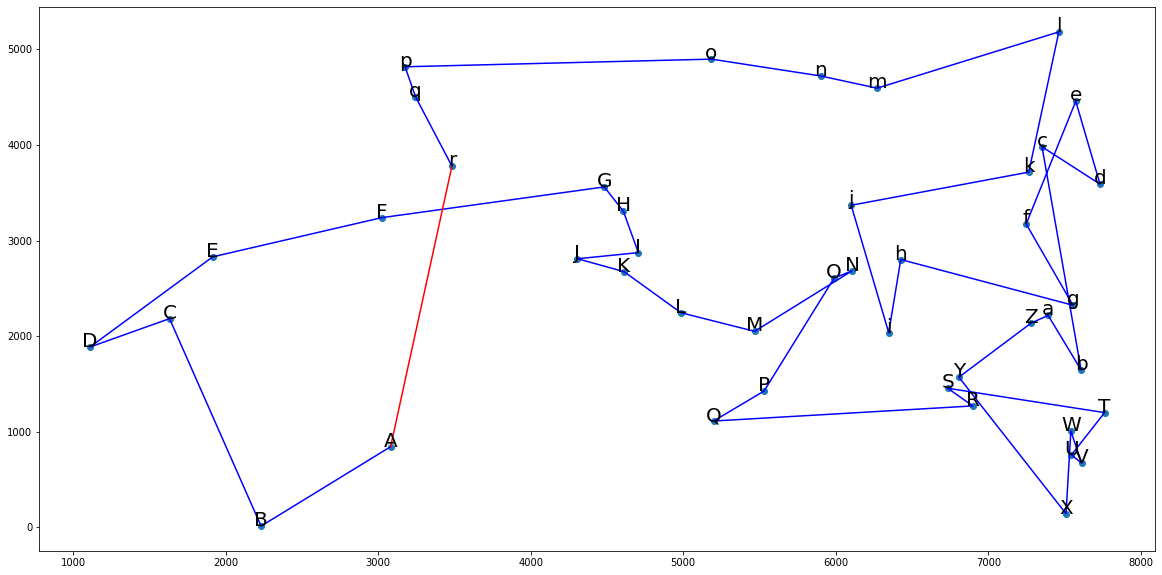

In [60]:
def GA(city_names,cities, population_size, eliteSize, mutat_rate, generations):
    population = CreatePopulation(cities,population_size)
    #print(population_)
    print("Intial distance: " + str(1 / rankPathes(population)[0][1]))
    for i in range(generations):
        population = get_following_gen(population, eliteSize, mutat_rate)
    print("Eventual distance: " + str(1 / rankPathes(population)[0][1]))
    optimal_route_id = rankPathes(population)[0][0]
    optimal_route = population[optimal_route_id]
    ordered_cities = get_names(optimal_route,cities,city_names)
    print([(indx,val) for indx,val in enumerate(ordered_cities)])
    plot_graph(optimal_route,names)
    return optimal_route

result_lst = GA(names,points, population_size=100, 
                 eliteSize=5, mutat_rate=0.01, 
                 generations=500)